In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.metrics import plot_confusion_matrix, confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, ConfusionMatrixDisplay, classification_report

In [36]:
df = pd.read_csv("merged_train_df.csv", low_memory = False)
df.drop("Unnamed: 0", inplace=True, axis=1)
df["Respondent ZCTA"]= df["Respondent ZCTA"].astype(str)

In [37]:
df.columns

Index(['Hearing Result', 'Issuing Agency', 'Violation Location (Borough)',
       'Respondent Address (Borough)', 'Decision Location (Borough)',
       'Charge #1: Code Section', 'weekend_indi', 'Season',
       'Respondent Status', 'Respondent ZCTA',
       'Estimate!!Nonfamily households!!Median income (dollars)',
       'Estimate!!Nonfamily households!!Mean income (dollars)',
       'Estimate!!Nonfamily households!!Total!!Less than $10,000',
       'Estimate!!Nonfamily households!!Total!!$10,000 to $14,999',
       'Estimate!!Nonfamily households!!Total!!$15,000 to $24,999',
       'Estimate!!Nonfamily households!!Total!!$25,000 to $34,999',
       'Estimate!!Nonfamily households!!Total!!$35,000 to $49,999',
       'Estimate!!Nonfamily households!!Total!!$50,000 to $74,999',
       'Estimate!!Households!!Median income (dollars)',
       'Estimate!!Households!!Mean income (dollars)',
       'Estimate!!Households!!Total!!Less than $10,000',
       'Estimate!!Households!!Total!!$10,000

In [38]:
list_to_convert = ['Estimate!!Nonfamily households!!Median income (dollars)',
       'Estimate!!Nonfamily households!!Mean income (dollars)',
       'Estimate!!Nonfamily households!!Total!!Less than $10,000',
       'Estimate!!Nonfamily households!!Total!!$10,000 to $14,999',
       'Estimate!!Nonfamily households!!Total!!$15,000 to $24,999',
       'Estimate!!Nonfamily households!!Total!!$25,000 to $34,999',
       'Estimate!!Nonfamily households!!Total!!$35,000 to $49,999',
       'Estimate!!Nonfamily households!!Total!!$50,000 to $74,999',
       'Estimate!!Households!!Median income (dollars)',
       'Estimate!!Households!!Mean income (dollars)',
       'Estimate!!Households!!Total!!Less than $10,000',
       'Estimate!!Households!!Total!!$10,000 to $14,999',
       'Estimate!!Households!!Total!!$15,000 to $24,999',
       'Estimate!!Households!!Total!!$25,000 to $34,999',
       'Estimate!!Households!!Total!!$35,000 to $49,999',
       'Estimate!!Households!!Total!!$50,000 to $74,999']

In [39]:
def fill_na(column):
    for x in column:
        df[x].fillna(0, inplace=True)
    
    return df.head(2)

In [40]:
fill_na(list_to_convert)

,Hearing Result,Issuing Agency,Violation Location (Borough),Respondent Address (Borough),Decision Location (Borough),Charge #1: Code Section,weekend_indi,Season,Respondent Status,Respondent ZCTA,...,"Estimate!!Nonfamily households!!Total!!$35,000 to $49,999","Estimate!!Nonfamily households!!Total!!$50,000 to $74,999",Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),"Estimate!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Estimate!!Households!!Total!!$25,000 to $34,999","Estimate!!Households!!Total!!$35,000 to $49,999","Estimate!!Households!!Total!!$50,000 to $74,999"
0,0.0,SANITATION POLICE,QUEENS,QUEENS,In Person QUEENS,AC 16,0.0,Spring,Person,11372.0,...,14.5,19.3,60659.0,79621.0,4.3,4.5,10.2,9.6,14.7,19.0
1,0.0,POLICE DEPARTMENT,MANHATTAN,QUEENS,UNKNOWN,AC 17,1.0,Winter,Person,11372.0,...,14.5,19.3,60659.0,79621.0,4.3,4.5,10.2,9.6,14.7,19.0


In [41]:
x_train = df.drop("Hearing Result", axis=1)
y_train = df["Hearing Result"]

In [42]:
y_train.value_counts(normalize=True)

0.0    0.604015
1.0    0.395985
Name: Hearing Result, dtype: float64

In [43]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213243 entries, 0 to 213242
Data columns (total 25 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   Issuing Agency                                             213243 non-null  object 
 1   Violation Location (Borough)                               213243 non-null  object 
 2   Respondent Address (Borough)                               213243 non-null  object 
 3   Decision Location (Borough)                                213243 non-null  object 
 4   Charge #1: Code Section                                    213243 non-null  object 
 5   weekend_indi                                               213243 non-null  float64
 6   Season                                                     213243 non-null  object 
 7   Respondent Status                                          213243 non-null  object 

In [44]:
# Creating dummies
# Create the OneHotEncoder object

ohe = OneHotEncoder(drop='first')


# Transform the data into dummies

trans = ohe.fit_transform(x_train[['Issuing Agency',
                                   "Respondent Address (Borough)",
                                   "Violation Location (Borough)", 
                                   "Decision Location (Borough)",
                                  "Charge #1: Code Section",
                                  "Season","Respondent Status","Respondent ZCTA"]])


# Store the dummies matrix and name vector

data = trans.todense()
names = ohe.get_feature_names()


# Put the dummy variables in a dataframe

dummies = pd.DataFrame(data, columns=names)


# Join the dummies dataframe to the original

x_train = df.join(dummies)

In [45]:
x_train = x_train.drop(["Hearing Result", 
                        'Issuing Agency',
                        "Respondent Address (Borough)",
                        "Violation Location (Borough)", 
                        "Decision Location (Borough)",
                       "Charge #1: Code Section",
                        "Season",
                        "Respondent Status",
                        "Respondent ZCTA"], axis=1)

In [46]:
x_train.shape

(213243, 271)

In [53]:
y_train.shape

(213243,)

In [54]:
y_train.value_counts(normalize=True)

0.0    0.604015
1.0    0.395985
Name: Hearing Result, dtype: float64

In [47]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and binary target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision']
    
    results = cross_validate(pipe, 
                             X, 
                             y, 
                             return_train_score=True, 
                             scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Precision:', results['train_precision'].mean())
    print('Cross_Val Precision:', results['test_precision'].mean())


In [48]:
display_labels = ['No Fee Collected', 
                  'Fee Collected']

def print_cm_with_labels(y_true, 
                         y_pred, 
                         display_labels):
    
    
    '''
    Takes the true values and predicted values of a classifier and 
    plots a confusion matrix (normalized by predictions) using 
    a list of given display labels.
    '''
    cm = confusion_matrix(y_true, y_pred, normalize = 'pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  )

    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    ax.grid(False)
    disp.ax_.set_xticklabels(display_labels,rotation=45);

# FSM

In [64]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(x_train, y_train)
dummy_model.predict(x_train)
cv_results = cross_validate(dummy_model, x_train, y_train, return_train_score=True)

y_hat = dummy_model.predict(x_train)



print('Mean Test Score: {}'.format(cv_results['test_score'].mean()))
print('Mean Train Score: {}'.format(cv_results['train_score'].mean()))


acc = accuracy_score(y_train,y_hat)
macro_precision_score=precision_score(y_train, y_hat, average='macro')
micro_precision_score=precision_score(y_train, y_hat, average='micro')
macro_recall_score=recall_score(y_train, y_hat, average='macro')
micro_recall_score=recall_score(y_train, y_hat, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))

Mean Test Score: 0.6040151376515861
Mean Train Score: 0.6040151376593361


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.6040151376598528
Macro Precision Score: 0.3020075688299264
Micro Precision Score: 0.6040151376598528
Macro Recall Score: 0.5
Micro Recall Score: 0.6040151376598528


# Logistic Regression

In [58]:
lr_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state=42, max_iter=100000))
])
lr_pipe.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('lr', LogisticRegression(max_iter=100000, random_state=42))])

In [59]:
print_cv_scores(lr_pipe, x_train, y_train)

[0.69102665 0.69445584 0.69083907 0.68650898 0.68571764]
Training Accuracy 0.6897096354776621
##############
[0.56052897 0.48556824 0.54102089 0.5716798  0.66167229]
Cross_Val Accuracy 0.5640940390259632
##############
Training Precision: 0.6314565694575996
Cross_Val Precision: 0.4676765218568487


In [60]:
display_labels=display_labels

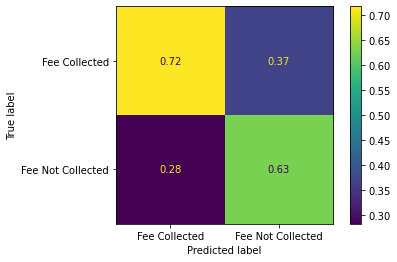

In [61]:
plot_confusion_matrix(lr_pipe, x_train, y_train, 
                      display_labels= ['Fee Collected', 'Fee Not Collected'], normalize="pred");

In [330]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

NameError: name 'lr' is not defined

# Decision Tree

In [29]:
dt_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', DecisionTreeClassifier())
])
dt_pipe.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lr', DecisionTreeClassifier())])

In [30]:
print_cv_scores(dt_pipe, x_train, y_train)

[0.76803991 0.77349731 0.76770578 0.76013951 0.75212638]
Training Accuracy 0.7643017781798973
##############
[0.61973317 0.60489109 0.61614575 0.6083052  0.63815419]
Cross_Val Accuracy 0.6174458789626414
##############
Training Precision: 0.7323411686382262
Cross_Val Precision: 0.5206786613120981


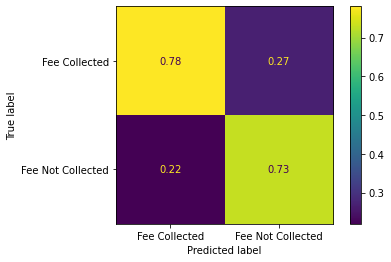

In [31]:
plot_confusion_matrix(dt_pipe, x_train, y_train, 
                      display_labels= ['Fee Collected', 'Fee Not Collected'], normalize="pred");

In [32]:
testing = pd.DataFrame(dt_pipe.steps[1][1].feature_importances_)

In [33]:
testing.sort_values(by = 0, ascending = False)

,0
17,0.154144
50,0.120785
11,0.056055
38,0.038767
0,0.036891
...,...
126,0.000000
214,0.000000
87,0.000000
121,0.000000


# Random Forest

In [36]:
rf_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight="balanced"))
])
rf_pipe.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('rf', RandomForestClassifier(class_weight='balanced'))])

In [37]:
print_cv_scores(rf_pipe, x_train, y_train)

[0.75724234 0.76358489 0.75673236 0.74811102 0.73983997]
Training Accuracy 0.753102116192838
##############
[0.65553706 0.61370724 0.65408333 0.63196398 0.66570531]
Cross_Val Accuracy 0.6441993841323024
##############
Training Precision: 0.6571158480097624
Cross_Val Precision: 0.5455521670486372


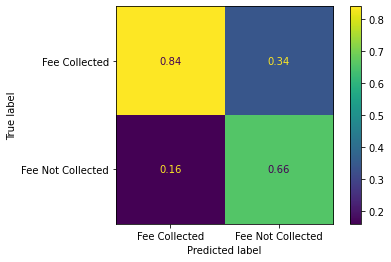

In [38]:
plot_confusion_matrix(rf_pipe, x_train, y_train, 
                      display_labels= ['Fee Collected', 'Fee Not Collected'], normalize="pred");

In [39]:
testing = pd.DataFrame(rf_pipe.steps[1][1].feature_importances_)

In [40]:
testing.sort_values(by = 0, ascending = False)

,0
17,7.731403e-02
0,5.911789e-02
50,5.892828e-02
38,5.288685e-02
81,4.909702e-02
...,...
130,3.405827e-07
128,1.464966e-07
125,3.351022e-08
126,4.897525e-09


In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213243 entries, 0 to 213242
Columns: 271 entries, weekend_indi to x7_nan
dtypes: float64(271)
memory usage: 440.9 MB


In [ ]:
Estimate!!Nonfamily households!!Total!!$15,000 to $24,999

# XGBoost

In [42]:
xgb_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('rf', XGBClassifier())
])
xgb_pipe.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:49:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ss', StandardScaler()),
                ('rf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [43]:
print_cv_scores(xgb_pipe, x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:52:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:54:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:57:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:59:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.72171354 0.723349   0.71972051 0.7143996  0.71506785]
Training Accuracy 0.7188501008623374
##############
[0.68041455 0.6488546  0.64522029 0.62162352 0.69391296]
Cross_Val Accuracy 0.6580051843489165
##############
Training Precision: 0.6726884621264894
Cross_Val Precision: 0.5967309933187795


In [44]:
display_labels = ['Written Off', 
                  'Defaulted', 
                  'Dismissed',
                  'In Violation']

def print_cm_with_labels(y_true, 
                         y_pred, 
                         display_labels):
    
    
    '''
    Takes the true values and predicted values of a classifier and 
    plots a confusion matrix (normalized by predictions) using 
    a list of given display labels.
    '''
    cm = confusion_matrix(y_true, y_pred, normalize = 'pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)

    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax)
    ax.grid(False)
    disp.ax_.set_xticklabels(display_labels,rotation=45);

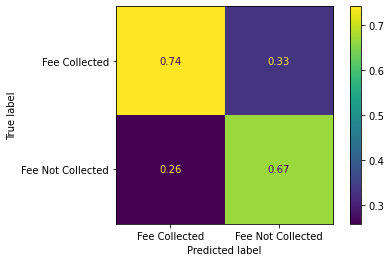

In [45]:
plot_confusion_matrix(xgb_pipe, x_train, y_train, 
                      display_labels= ['Fee Collected', 'Fee Not Collected'], normalize="pred");

In [357]:
xgb_pipe[1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)